# British Airways Reviews Data Analysis

It is a very simple project I have done for the sole perpouse of learning new things, So basically in this analysis I tried to visualize the reviews to see the difference between positive and negetive reviews. It is a Natural Language Processing (NLP) project.

To complete this project I used webscrapping to get the data www.airlinequality.com then i tried did sentiment analyze and wordcloud.


TO do sentiment analysis we need some python packages like nltk, WordCloud, re.

NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries.

NLTK has been called “a wonderful tool for teaching, and working in, computational linguistics using Python,” and “an amazing library to play with natural language.”

word cloud (also known as a tag cloud or text cloud) is a visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

The Python "re" module provides regular expression support.

** Importing NLTK and required packages

In [1]:
import nltk

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In this section webscrapping is being used to load data from 10 pages with 100 reviews in each page.

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


converting the data we got from webscrapping and making it into a dataframe.

In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Organised boarding process. ...
1,✅ Trip Verified | Outward journey BA245 Londo...
2,✅ Trip Verified | Check in agent at LHR was ve...
3,✅ Trip Verified | Very disappointing. I book ...
4,✅ Trip Verified | Excellent service both on th...


We can see we only got one column of data because we scrapped that way only. We got categorical text data in reviews. Here we can see the data is not clean so we need to clean the data, For example "✅ Trip Verified" is not required so in the next step I divided the column into two parts with usin "|" as delimiter and using lambda function.

In [5]:
df[["Not_Needed","Reviews"]] = df.reviews.apply(lambda x: pd.Series(str(x).split("|")))

In [6]:
df.head()


,reviews,Not_Needed,Reviews
0,✅ Trip Verified | Organised boarding process. ...,✅ Trip Verified,Organised boarding process. Really friendly c...
1,✅ Trip Verified | Outward journey BA245 Londo...,✅ Trip Verified,Outward journey BA245 London to Buenos Aires...
2,✅ Trip Verified | Check in agent at LHR was ve...,✅ Trip Verified,Check in agent at LHR was very helpful and fr...
3,✅ Trip Verified | Very disappointing. I book ...,✅ Trip Verified,Very disappointing. I book BA so I can fly d...
4,✅ Trip Verified | Excellent service both on th...,✅ Trip Verified,Excellent service both on the ground and on b...


After splitting the column into two different columns we got extra two columns for that we need to drop the columns that we dont need in this case it's Not_Needed & reviews columns  

In [7]:
df.drop('Not_Needed', inplace=True, axis=1)
df.drop('reviews', inplace=True, axis=1)

In [8]:
df.head()

,Reviews
0,Organised boarding process. Really friendly c...
1,Outward journey BA245 London to Buenos Aires...
2,Check in agent at LHR was very helpful and fr...
3,Very disappointing. I book BA so I can fly d...
4,Excellent service both on the ground and on b...


Now we import Sentiment Analyzer and Tqdm 

tqdm is a Python library for adding progress bar. It lets you configure and display a progress bar with metrics you want to track. Its ease of use and versatility makes it the perfect choice for tracking machine learning experiments.

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer as sia
from tqdm.notebook import tqdm

si = sia()

In [10]:
example = df['Reviews'][50]
print(example)

 Worst experience ever. Outbound flight was cancelled and I was not notified. I was rebooked on a very uncomfortable trip. Inbound flight delayed 1 hour, also not notified. On top of it, they boarded my hand luggage, which was the only bag I had. Extra wait in Milan then. Food is horrible.


Now we are tokenizing the text data for which I did a test run as you can see "data". I did it to see if all the packages that I imported is working properly or not if they need updation or not. Keep in mind if the packages are not updated it will return error and you will be left wondering what the error is. I think it's kind of AGIlE way of error reduction (XD).  

In [11]:
import nltk
from nltk.tokenize import word_tokenize
data = "I pledge to be a data scientist one day"

In [12]:
tokenized_text=word_tokenize(data)

In [13]:
print(tokenized_text)

['I', 'pledge', 'to', 'be', 'a', 'data', 'scientist', 'one', 'day']


In this following code i just added another row as ID it's not that necessary though.

In [14]:
print(df)
length = len(df)+1
print(length)
ID = []
for i in range(1,length):
    ID.append(i)

                                               Reviews
0     Organised boarding process. Really friendly c...
1      Outward journey BA245 London to Buenos Aires...
2     Check in agent at LHR was very helpful and fr...
3      Very disappointing. I book BA so I can fly d...
4     Excellent service both on the ground and on b...
..                                                 ...
995   Flew London to Budapest with British Airways....
996    Paid for a Vueling Airlines flight from Flor...
997   London to Sao Paulo. Overnight club world fli...
998   Worst BA flight ever! Flew Tampa to London Ga...
999   Flew British Airways from London Heathrow to ...

[1000 rows x 1 columns]
1001


In [15]:
df["ID"]=ID

In [16]:
df.head()

,Reviews,ID
0,Organised boarding process. Really friendly c...,1
1,Outward journey BA245 London to Buenos Aires...,2
2,Check in agent at LHR was very helpful and fr...,3
3,Very disappointing. I book BA so I can fly d...,4
4,Excellent service both on the ground and on b...,5


In following cell I created an empty dictionary and then using for loop and tqdm I stored the polarity score in the empty dictionary.

Polarity score in the range of -1 to -0.5 typically indicates negative sentiment. Polarity score greater than -0.5 and less than +0.5 typically indicates neutral sentiment. Polarity score in the range of +0.5 to 1 typically indicates positive sentiment.

In [17]:
dic = {}

for i,row in tqdm(df.iterrows(), total = len(df)):
    t = df.Reviews[i]
    myid = df.ID[i]
    dic[myid] = si.polarity_scores(t)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [18]:
dic

{1: {'neg': 0.0, 'neu': 0.605, 'pos': 0.395, 'compound': 0.9371},
 2: {'neg': 0.095, 'neu': 0.817, 'pos': 0.088, 'compound': -0.098},
 3: {'neg': 0.203, 'neu': 0.578, 'pos': 0.219, 'compound': 0.3774},
 4: {'neg': 0.093, 'neu': 0.854, 'pos': 0.054, 'compound': -0.2374},
 5: {'neg': 0.019, 'neu': 0.815, 'pos': 0.166, 'compound': 0.7962},
 6: {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.4404},
 7: {'neg': 0.013, 'neu': 0.839, 'pos': 0.148, 'compound': 0.9131},
 8: {'neg': 0.079, 'neu': 0.894, 'pos': 0.027, 'compound': -0.891},
 9: {'neg': 0.078, 'neu': 0.922, 'pos': 0.0, 'compound': -0.6808},
 10: {'neg': 0.043, 'neu': 0.881, 'pos': 0.075, 'compound': 0.8351},
 11: {'neg': 0.111, 'neu': 0.772, 'pos': 0.116, 'compound': 0.3597},
 12: {'neg': 0.019, 'neu': 0.72, 'pos': 0.261, 'compound': 0.9612},
 13: {'neg': 0.048, 'neu': 0.908, 'pos': 0.044, 'compound': -0.1306},
 14: {'neg': 0.069, 'neu': 0.821, 'pos': 0.11, 'compound': 0.7121},
 15: {'neg': 0.15, 'neu': 0.821, 'pos': 0.028, '

In [19]:
new = pd.DataFrame(dic).T
new.describe()

,neg,neu,pos,compound
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,0.080755,0.807870,0.11139,0.109414
std,0.059315,0.081279,0.09132,0.782732
min,0.000000,0.436000,0.00000,-0.997400
25%,0.038000,0.765000,0.04600,-0.765300
50%,0.071500,0.816000,0.08600,0.302450
75%,0.113000,0.864250,0.15700,0.923450
max,0.348000,1.000000,0.49000,0.999200


In the following cell I removed the punctuation that might create problem in analysis and also I converted every text as lower case so that computer does not identify lowercase and upper case of same word as two different.

In [20]:
import re
df['Reviews'] = \
df['Reviews'].map(lambda x: re.sub('[,\.!?]', '', x))
df['Reviews'] = \
df['Reviews'].map(lambda x: x.lower())
df['Reviews'].head()

0     organised boarding process really friendly cr...
1      outward journey ba245 london to buenos aires...
2     check in agent at lhr was very helpful and fr...
3      very disappointing i book ba so i can fly du...
4     excellent service both on the ground and on b...
Name: Reviews, dtype: object

In the following sell I am importing wordcloud and plotiing the wordcloud image of the data which shows the word which are used in more frequency.

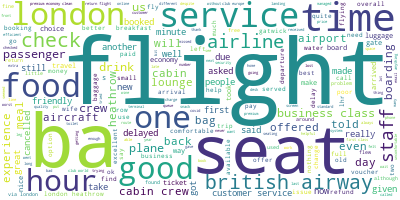

In [21]:
from wordcloud import WordCloud
long_string = ','.join(list(df['Reviews'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [22]:
new.head()

,neg,neu,pos,compound
1,0.000,0.605,0.395,0.9371
2,0.095,0.817,0.088,-0.0980
3,0.203,0.578,0.219,0.3774
4,0.093,0.854,0.054,-0.2374
5,0.019,0.815,0.166,0.7962


As this data did not had anything other than reviews column I made the compound column which we got after toekenization as the prime factor here any values > 0.5 is considered Positive and any value < -0.5 is considered as Negative value.

In [23]:
new3 = new.drop(new[(new['compound'] >-0.5) & (new['compound'] < 0.5)].index, inplace=False)
new3.head(100)

,neg,neu,pos,compound
1,0.000,0.605,0.395,0.9371
5,0.019,0.815,0.166,0.7962
7,0.013,0.839,0.148,0.9131
8,0.079,0.894,0.027,-0.8910
9,0.078,0.922,0.000,-0.6808
...,...,...,...,...
122,0.197,0.803,0.000,-0.7650
123,0.102,0.816,0.082,-0.5239
124,0.079,0.835,0.086,0.8271
125,0.008,0.947,0.046,0.6428


In [24]:
new3.head(100)
new2 = new3

Now in this cell I am giving the value 1 to positive compund outcomes and -1 to negative compound outcomes.

In [25]:
new2['sentiment'] = new3['compound'].apply(lambda x : +1 if x > 0.5 else -1  )
new2.head(100)

,neg,neu,pos,compound,sentiment
1,0.000,0.605,0.395,0.9371,1
5,0.019,0.815,0.166,0.7962,1
7,0.013,0.839,0.148,0.9131,1
8,0.079,0.894,0.027,-0.8910,-1
9,0.078,0.922,0.000,-0.6808,-1
...,...,...,...,...,...
122,0.197,0.803,0.000,-0.7650,-1
123,0.102,0.816,0.082,-0.5239,-1
124,0.079,0.835,0.086,0.8271,1
125,0.008,0.947,0.046,0.6428,1


Here I created two different dataframe one for Positive and one for Negative

In [26]:
positive = new2[new2['sentiment'] == 1]
negative = new2[new2['sentiment'] == -1]

In [27]:
positive.head()

,neg,neu,pos,compound,sentiment
1,0.000,0.605,0.395,0.9371,1
5,0.019,0.815,0.166,0.7962,1
7,0.013,0.839,0.148,0.9131,1
10,0.043,0.881,0.075,0.8351,1
12,0.019,0.720,0.261,0.9612,1


Lastly I plotted the total count of Positive and Negetive reviews here we can see the positive reviews are more than negative but that does not mean that the customers are totally satisfied with the Airways totally as the gap between Positive and negative reviews are very close.

In [28]:
import plotly.express as px
new2['sentimentt'] = new2['sentiment'].replace({-1 : 'negative'})
new2['sentimentt'] = new2['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(new2, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

As conclusion I can say that as this was my first nlp project i learned a lot of new things.

I hope to do more in depth advance analysis in the future. Any feedback is much appriciated.